In [3]:

from torchvision import transforms
import matplotlib.pyplot as plt
import torchvision
import numpy as np 
from datasetloader import Cifar10Loader
from forward_process import forward_process_for_single_image 
class Cifar10Visualizer():

    def __init__(self, cifar10_loader):
        self.loader = cifar10_loader

    def show_images(self, num_images=16):
        data_iter = iter(self.loader.dataloader)
        images, _ = next(data_iter)

        fig, axes = plt.subplots(nrows=num_images // 4, ncols=4, figsize=(10, 10))

        for i in range(num_images):
            img = torchvision.transforms.ToPILImage()(images[i] / 2 + 0.5)  
            axes[i // 4, i % 4].imshow(img)
            axes[i // 4, i % 4].axis('off')

        plt.show()
 
class Cifar10ForwardProcess():
    def __init__(self, cifar10_loader ): 
        self.loader = cifar10_loader

    def show_images_with_noise(self,total_step,max_step,start_index, batch_size=16):
        subplot_width=4
        subplot_height=4 
        fig_width = total_step * subplot_width
        fig_height = batch_size * subplot_height
        fig, axes = plt.subplots(batch_size, total_step, figsize=(fig_width,fig_height))

        data_iter = iter(self.loader.dataloader)
        images, _ = next(data_iter)
        times = np.linspace(start_index,max_step-1,total_step,dtype=np.int32)
        print(times)
        for ix,img in enumerate(images):   
            for iy, time in enumerate(times):
                noisy_image = forward_process_for_single_image(img,t=time) 
                noisy_image_np = transforms.ToPILImage()(noisy_image/ 2 + 0.5)
                axes[ix, iy].imshow(noisy_image_np)
                axes[ix, iy].axis('off')   

        plt.show()



Files already downloaded and verified


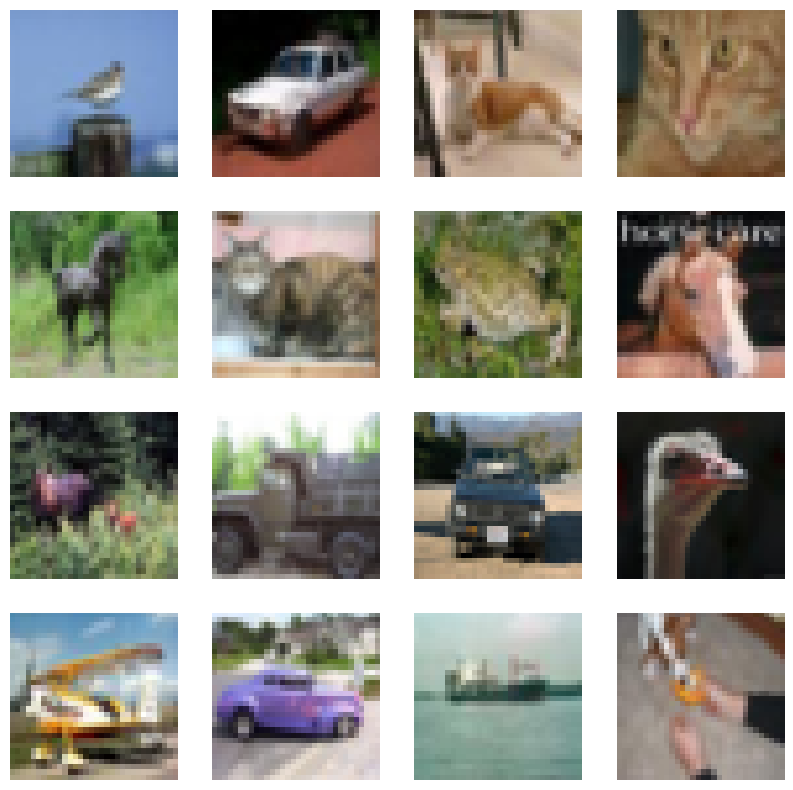

In [2]:

batch_size = 16
cifar_loader = Cifar10Loader(batch_size)
visualizer = Cifar10Visualizer(cifar_loader)
visualizer.show_images(num_images=16)


Files already downloaded and verified
[ 0  5 10 15 21 26 31 37 42 47 52 58 63 68 74]


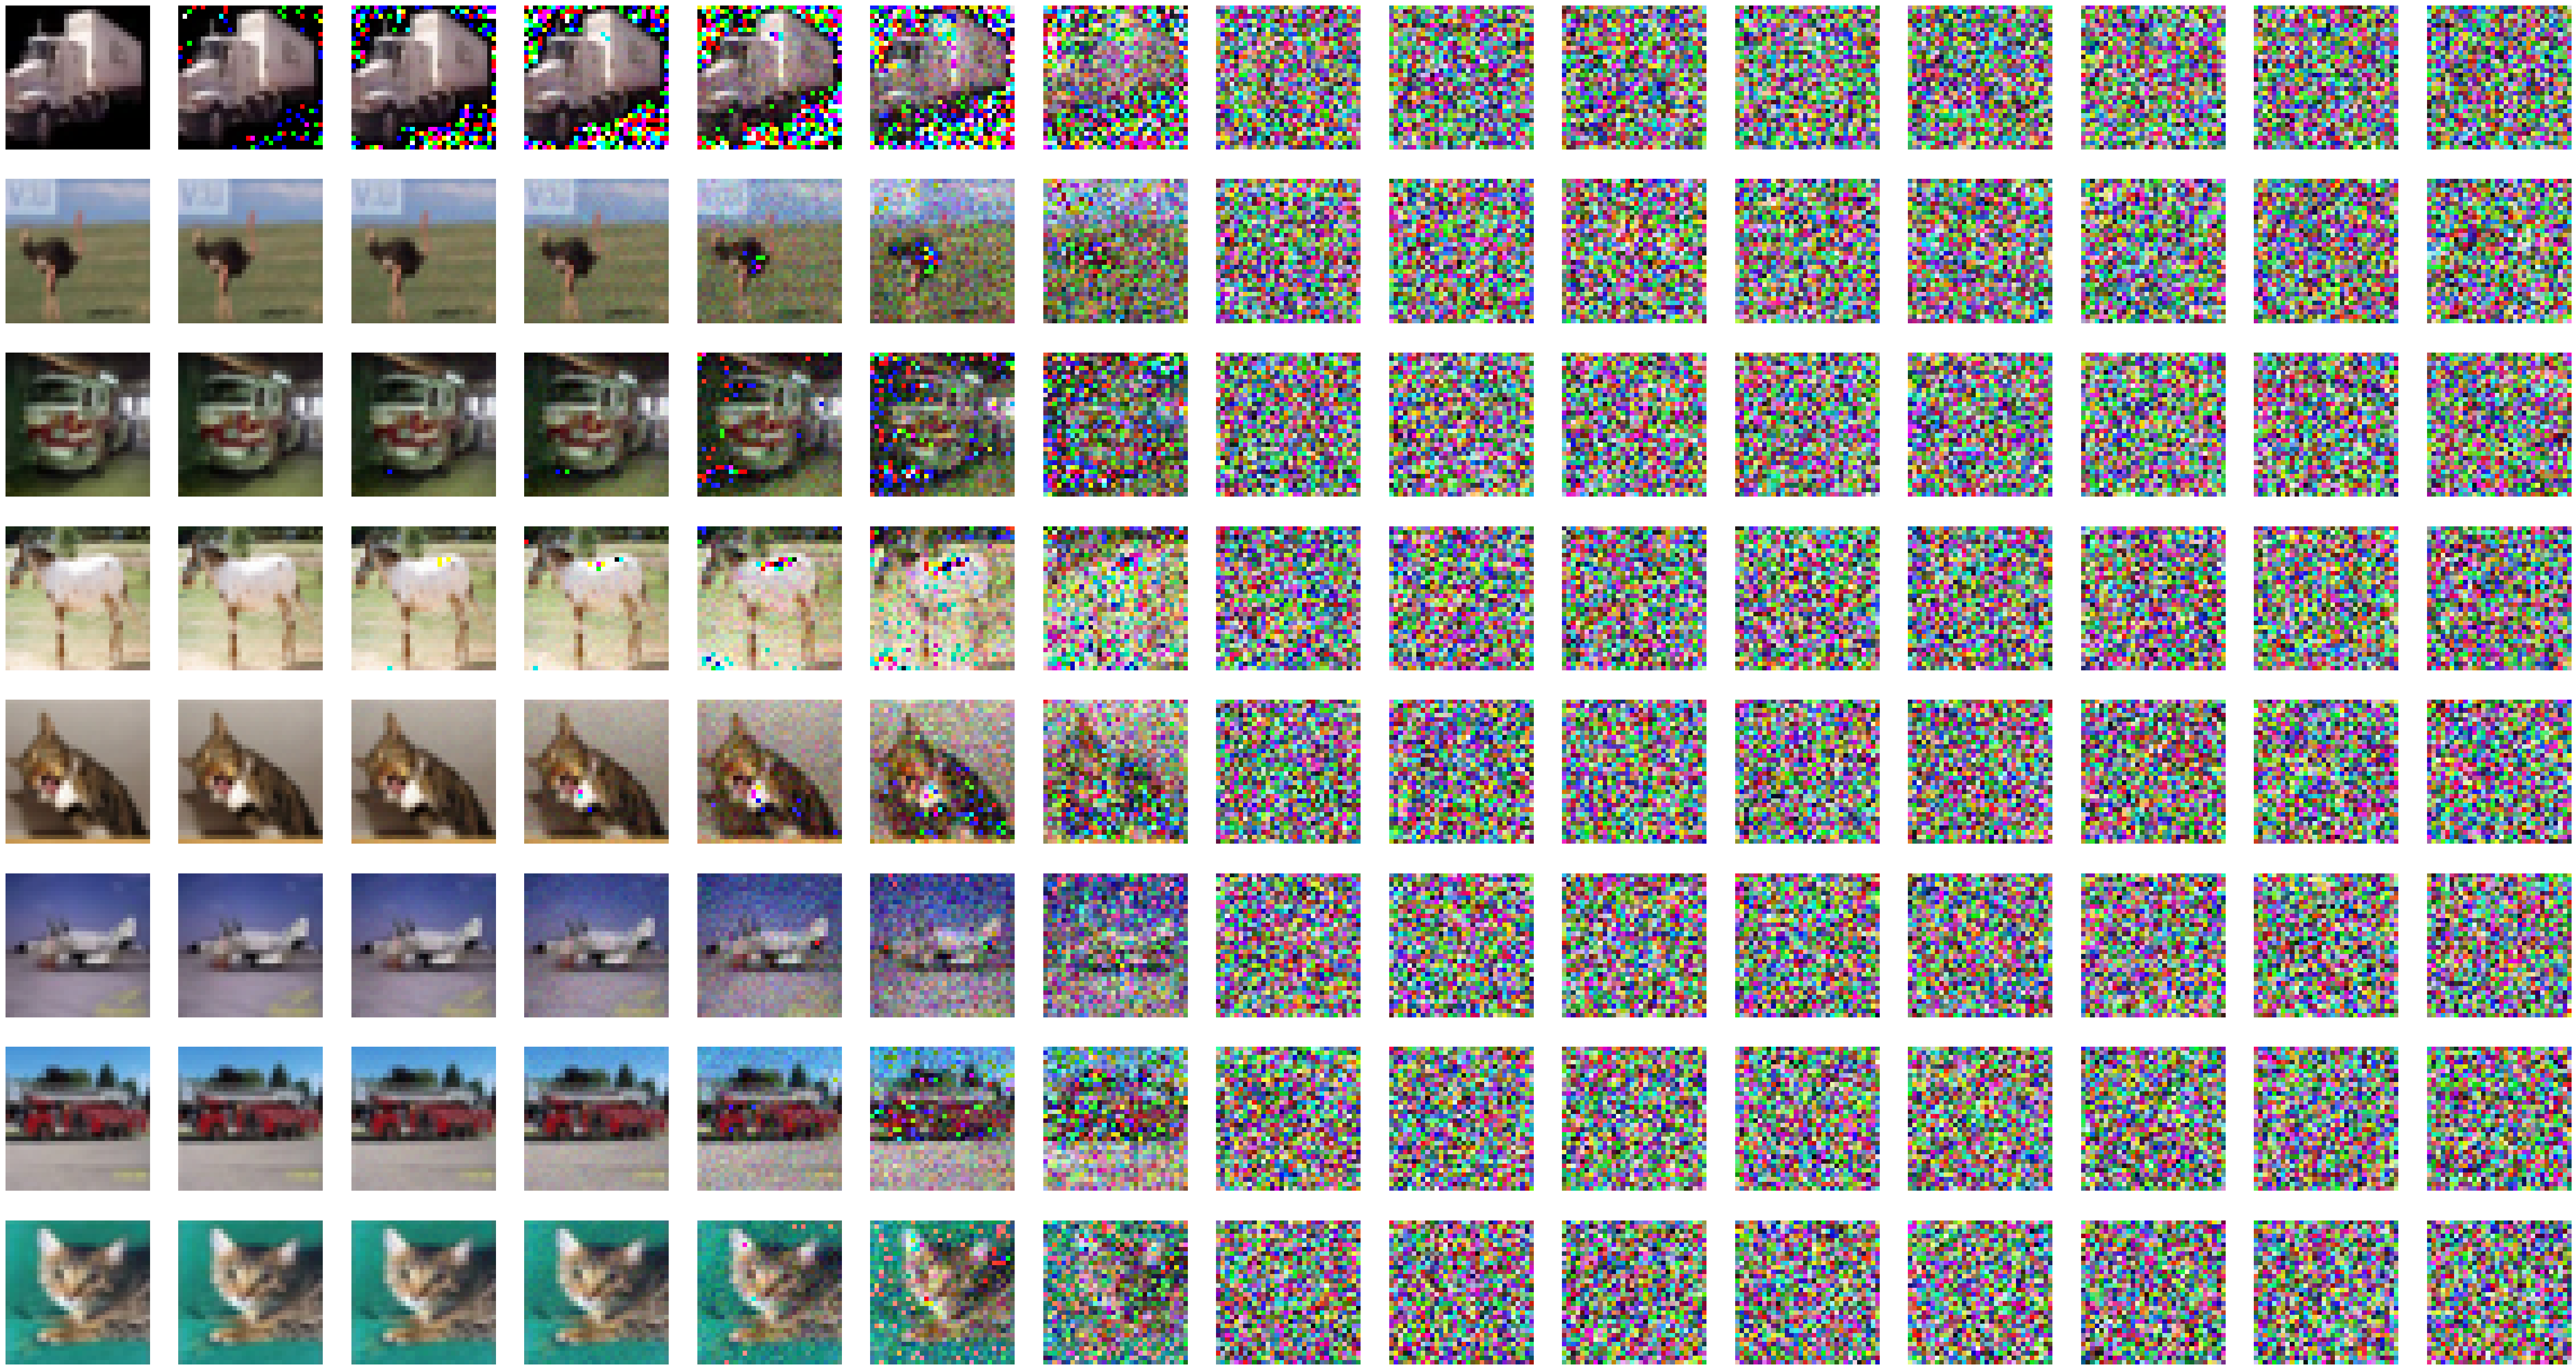

In [2]:

batch_size = 8
total_step=15
max_step=75
start_index=0
cifar_loader = Cifar10Loader(batch_size)
visualizer = Cifar10ForwardProcess(cifar_loader)
visualizer.show_images_with_noise(total_step,max_step,start_index, batch_size=batch_size)

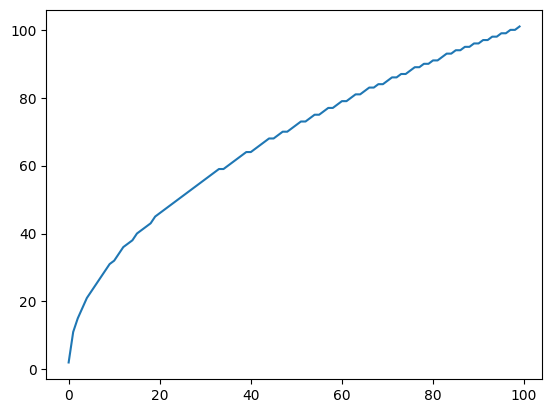

In [23]:
import math
import numpy as np
from model.utils import kerras_boundaries
import matplotlib.pyplot as plt     # for plotting

epochs=100
s1=100
s0=2
len_array=[]
for epoch in range(epochs):
    N1 = math.ceil(math.sqrt( (epoch/epochs)* ((s1 +1 )**2   - s0**2)   + s0**2) - 1) + 1 
    len_array.append(N1)

    boundaries1 = kerras_boundaries(7.0, 0.002, N1, 80.0).numpy() 
    r= np.random.randint(0,N1-1) 
    #t = torch.randint(0, N - 1, (1, 1))
    tb1 = boundaries1[r]  


plt.plot(len_array)
plt.show()
